Author: [Chuong Hoa Loc](https://github.com/Locchuong96)
[email](locchuong123@gmail.com)

### RNN application on sequence data

![models](models.png)

**RNN**

|   |   |   |
|---|---|---|
|$m$| sequence lenght||
|$n$| hidden node||
|$x_{t}$| input vector |`(mx1)`|
|$h_{t}$| hidden layer vector |`(nx1)`|
|$o_{t}$| output vector |`(nx1)`|
|$y_{t}$| output vector |`(nx1)`|
|$b_{h}$| bias vector |`(nx1)`|
|$b_{y}$| bias vector |`(1xn)`|
|$U$| x-matrix |`(n,m)`|
|$W$| h-matrix |`(n,n)`|
|$V$| y-matrix |`(1,n)`|

![RNN](RNN2.png)

$h_{t} = tanh{(z_{t})} = tanh{(U.x_{t} + W.h_{t-1} + b_{h})}$

$o_{t} = y_{t} = sigmoid(V.h_{t}+b_{y})$

**GRU**

*Note*: in `GRU` memory_state = hidden_state $c_{t} = a_{t} (h_{t})$

|   |   |   |
|---|---|---|
|$x_{t}$| input vector ||
|$h_{t}$| hidden layer vector ||
|$b_{u}$| bias vector ||
|$b_{r}$| bias vector ||
|$b_{h}$| bias vector ||
|$W_{u}$| parameter matrix ||
|$W_{r}$| parameter matrix ||
|$W_{h}$| parameter matrix ||

Update gate:

It help to decide which information from the previous time $h_{t-1}$ step can be take forward to the next time step $h_{t}$

$u_{t} = \sigma{(W_{u}.[h_{t-1},x_{t}] + b_{u})}$

Reset gate: 

It help to decide how to add the new information to the memory i.e how much of the past information can be forget
$r_{t} = \sigma{(W_{r}.[h_{t-1},x_{t}] + b_{r})}$

Candidate state: 

candidate state is created to holding the new information

$\tilde{h}_{t} = \tanh{(W_{h}.[r_{t} \odot h_{t-1},x_{t}] + b_{h})}$

Hidden state: $h_{t} = (1-u_{t})\odot h_{t-1}+u_{t}\odot\tilde{h}_{t}$

Output value: $y_{t}  = V.h_{t} + b_{y}$

![GRU](GRU_1.png)

**LSTM**

|   |   |   |
|---|---|---|
|$x_{t}$| input vector ||
|$h_{t}$| hidden layer vector ||
|$c_{t}$| hidden layer vector ||
|$b_{f}$| bias vector ||
|$b_{i}$| bias vector ||
|$b_{c}$| bias vector ||
|$b_{o}$| bias vector ||
|$W_{f}$| parameter matrix ||
|$W_{i}$| parameter matrix ||
|$W_{c}$| parameter matrix ||
|$W_{o}$| parameter matrix ||

![LSTM](LSTM_1.png)

Forget gate: $f_{t} = \sigma{(W_{f}.[h_{t-1},x_{t}] + b_{f})}$

Input gate: $i_{t} = \sigma{(W_{i}.[h_{t-1},x_{t}] + b_{i})}$

Output gate: $o_{t} = \sigma{(W_{o}.[h_{t-1},x_{t}] + b_{o})}$

Candidate: $\tilde{C}_{t} = \tanh{(W_{c}.[h_{t-1},x_{t}] + b_{c})} $

New cell state: $C_{t} = f_{t} \odot C_{t-1} + i_{t} \odot \tilde{C}_{t}$

Hidden state: $h_{t} = o_{t} \odot \tanh{C_{t}}$

**Overview**

![rnn_models](rnn_models_1.png)


### build GRU (Gated Recurrent Units) from scratch

**forward pass**

![gru_forward](gru_forward.png)

Update gate: $u_{t} = \sigma{(W_{u}.[h_{t-1},x_{t}] + b_{u})}$

Relevant gate: $r_{t} = \sigma{(W_{r}.[h_{t-1},x_{t}] + b_{r})}$

Content state: $\tilde{h}_{t} = \tanh{(W_{h}.[r_{t} \odot h_{t-1},x_{t}] + b_{h})}$

Hidden state: $h_{t} = (1-u_{t})\odot h_{t-1}+u_{t}\odot\tilde{h}_{t}$

Output value: $y_{t}  = V.h_{t} + b_{y}$

**loss function**

this demo use *mean square error* to calculate how wrong between your prediction and the ground-truth

$$ L = \sum_{k}^{m}L_{k} = \frac{1}{2m} * \sum_{k}^{m} (y_{k} - \hat{y}_{k})^{2}$$

**backward pass (backpropagation though time)**

![gru_backward](gru_backward.png)

$$ \frac{\partial{h_{t}}}{\partial{h_{t-1}}} \space -> \space \frac{\partial{h_{t+1}}}{\partial{h_{t}}} \space -> \space \frac{\partial{h_{t+2}}}{\partial{h_{t+1}}}$$

We need to find:

$$\frac{\partial{L}}{\partial{U_{u}}}, \frac{\partial{L}}{\partial{W_{u}}}, \frac{\partial{L}}{\partial{b_{u}}}$$

$$\frac{\partial{L}}{\partial{U_{r}}}, \frac{\partial{L}}{\partial{W_{r}}}, \frac{\partial{L}}{\partial{b_{r}}}$$

$$\frac{\partial{L}}{\partial{U_{h}}}, \frac{\partial{L}}{\partial{W_{h}}}, \frac{\partial{L}}{\partial{b_{h}}}$$

$$\frac{\partial{L}}{\partial{V}}, \frac{\partial{L}}{\partial{b_{y}}}$$

then we do `gradient descent`:

$$U_{u} = U_{u} - lr * \frac{\partial{L}}{\partial{U_{u}}}, W_{u} = W_{u} - lr * \frac{\partial{L}}{\partial{W_{u}}}, b_{u} = b_{u} - lr * \frac{\partial{L}}{\partial{b_{u}}}$$

$$U_{r} = U_{r} - lr *  \frac{\partial{L}}{\partial{U_{r}}}, W_{r} = W_{r} - lr * \frac{\partial{L}}{\partial{W_{r}}}, b_{r} = b_{r} - lr * \frac{\partial{L}}{\partial{b_{r}}}$$

$$U_{h} = U_{h} - lr *  \frac{\partial{L}}{\partial{U_{h}}}, W_{h} = W_{h} - lr * \frac{\partial{L}}{\partial{W_{h}}}, b_{h} = b_{h} - lr *  \frac{\partial{L}}{\partial{b_{h}}}$$

$$V = V - lr * \frac{\partial{L}}{\partial{V}},b_{y} = b_{y} - lr * \frac{\partial{L}}{\partial{b_{y}}}$$

Let follow these step:  
`chain rule: [term] -> [implicit and explicit] -> [right shape]` -> `references: [blog] [video] [github]` -> `bptt a part`

$$ (explicit) \space \frac{\partial{L}}{\partial{\hat{y}}} = y - \hat{y} \space [1]$$

Calculate `hidden state`

$$(explicit) \space \frac{\partial{L}}{\partial{V}} = \frac{\partial{L}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{V}} = \frac{\partial{L}}{\partial{\hat{y}}} .h_{t} \space [2]$$

Calculate `content state`,`reset state`,`update state` $\frac{\partial{L}}{\partial{\tilde{h_{t}}}} , \frac{\partial{L}}{\partial{r_{t}}} , \frac{\partial{L}}{\partial{u_{t}}}$

$$\frac{\partial{L}}{\partial{\tilde{h_{t}}}} = \frac{\partial{L}}{\partial{h_{t}}} \frac{\partial{h_{t}}}{\partial{\tilde{h_{t}}}} = \frac{\partial{L}}{\partial{h_{t}}}.u_{t} \space [3]$$

$$\frac{\partial{L}}{\partial{r_{t}}} = \frac{\partial{L}}{\partial{\tilde{h_{t}}}} \frac{\partial{\tilde{h_{t}}}}{\partial{r_{t}}} = \frac{\partial{L}}{\partial{\tilde{h_{t}}}}.(1-\tilde{h_{t}}^{2})(W_{h}.h_{t-1}) \space [4]$$

$$\frac{\partial{L}}{\partial{u_{t}}} = \frac{\partial{L}}{\partial{h_{t}}}.(-h_{t-1} + \tilde{h_{t}}) \space [5]$$

Calculate $\frac{\partial{L}}{\partial{V}}, \frac{\partial{L}}{\partial{b_{y}}}$

$$\frac{\partial{L}}{\partial{V}} = \frac{\partial{L}}{\partial{\hat{y}}} \frac{\partial{\hat{y}}}{\partial{V}} =  \frac{\partial{L}}{\partial{\hat{y}}}.h_{t}\space [6]$$

$$\frac{\partial{L}}{\partial{b_{y}}} = \frac{\partial{\hat{y}}}{\partial{b_{y}}} =  \frac{\partial{L}}{\partial{\hat{y}}}.1 \space [7]$$

Calculate $\frac{\partial{L}}{\partial{U_{h}}}, \frac{\partial{L}}{\partial{W_{h}}}, \frac{\partial{L}}{\partial{b_{h}}}$

$$\frac{\partial{L}}{\partial{U_{h}}} = \frac{\partial{L}}{\partial{\tilde{h_{t}}}} \frac{\partial{\tilde{h_{t}}}}{\partial{U_{h}}} = \frac{\partial{L}}{\partial{\tilde{h_{t}}}} .(1- \tilde{h_{t}}^{2}).x_{t} \space [8]$$

$$\frac{\partial{L}}{\partial{W_{h}}} = \frac{\partial{L}}{\partial{\tilde{h_{t}}}} \frac{\partial{\tilde{h_{t}}}}{\partial{W_{h}}} = \frac{\partial{L}}{\partial{\tilde{h_{t}}}} .(1- \tilde{h_{t}}^{2}).h_{t-1} \space [9]$$

$$\frac{\partial{L}}{\partial{b_{h}}} = \frac{\partial{L}}{\partial{\tilde{h_{t}}}} \frac{\partial{\tilde{h_{t}}}}{\partial{b_{h}}} = \frac{\partial{L}}{\partial{\tilde{h_{t}}}} .(1- \tilde{h_{t}}^{2}).1 \space [10]$$

Calculate $\frac{\partial{L}}{\partial{U_{u}}}, \frac{\partial{L}}{\partial{W_{u}}}, \frac{\partial{L}}{\partial{b_{u}}}$

$$\frac{\partial{L}}{\partial{U_{u}}} = \frac{\partial{L}}{\partial{u_{t}}} \frac{\partial{u_{t}}}{\partial{U_{u}}} = \frac{\partial{L}}{\partial{u_{t}}}.x_{t} \space [11]$$ 

$$\frac{\partial{L}}{\partial{W_{u}}} = \frac{\partial{L}}{\partial{u_{t}}} \frac{\partial{u_{t}}}{\partial{W_{u}}} = \frac{\partial{L}}{\partial{u_{t}}}.h_{t-1} \space [12]$$ 

$$\frac{\partial{L}}{\partial{b_{u}}} = \frac{\partial{L}}{\partial{u_{t}}} \frac{\partial{u_{t}}}{\partial{b_{u}}} = \frac{\partial{L}}{\partial{u_{t}}}.1 \space [13]$$ 


Calculate $\frac{\partial{L}}{\partial{U_{r}}}, \frac{\partial{L}}{\partial{W_{r}}}, \frac{\partial{L}}{\partial{b_{r}}}$

$$\frac{\partial{L}}{\partial{U_{r}}} = \frac{\partial{L}}{\partial{r_{t}}} \frac{\partial{r_{t}}}{\partial{U_{r}}} = \frac{\partial{L}}{\partial{u_{t}}}.x_{t} \space [14]$$ 

$$\frac{\partial{L}}{\partial{W_{r}}} = \frac{\partial{L}}{\partial{r_{t}}} \frac{\partial{r_{t}}}{\partial{W_{r}}} = \frac{\partial{L}}{\partial{u_{t}}}.h_{t-1} \space [15]$$ 

$$\frac{\partial{L}}{\partial{b_{r}}} = \frac{\partial{L}}{\partial{r_{t}}} \frac{\partial{r_{t}}}{\partial{b_{r}}} = \frac{\partial{L}}{\partial{u_{t}}}.1 \space [16]$$ 

We should define min and max value for updating gradient descent, if you don't your gradients may be exploring or vanishing, and your loss does not reduce anymore

In [32]:
# import the libraries
import tqdm
import math 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# define activation functions

# sigmoid function get value from 0~1
def sigmoid(x):
    return 1/(1+np.exp(-x))

# tanh function get value from -1~1
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

200


Text(0.5, 1.0, 'sequence data')

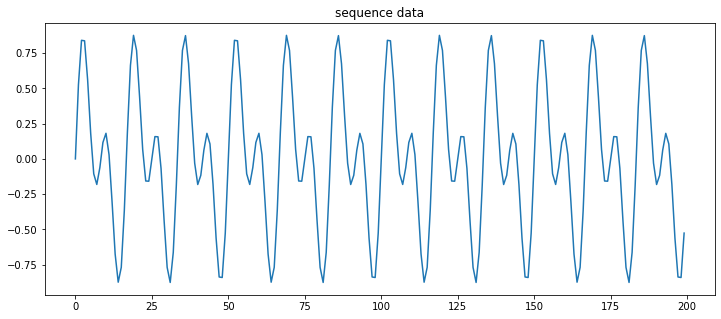

In [3]:
# make dataset
f = 30
seq_data = np.array([(0.5*math.sin(1*f*2*np.pi*x) + 0.5*math.sin(2*f*2*np.pi*x)) for x in np.arange(0,0.4,0.002)]) 
print(len(seq_data))
# visualize the seq_wave
fig = plt.figure(figsize = (12,5))
plt.plot(seq_data)
plt.title('sequence data')

In [4]:
# training dataset
X = []
Y = []
seq_len = 50
num_records = len(seq_data) - seq_len

print(f'seq_len: {seq_len}')
print(f'num_records: {num_records}')

for i in range(num_records):
    X.append(seq_data[i:i+seq_len])
    Y.append(seq_data[i+seq_len])

X = np.array(X)
Y = np.array(Y)
X = np.expand_dims(X,2) # reshape to (training_sample,seq_len,1)
Y = np.expand_dims(Y,1) # (training_sample,1)

print(f'X.shape: {X.shape}')
print(f'Y.shape: {Y.shape}')

seq_len: 50
num_records: 150
X.shape: (150, 50, 1)
Y.shape: (150, 1)


In [5]:
# testing dataset
X_val = []
Y_val = []
seq_len = 50
num_records = len(seq_data) - seq_len

for i in range(num_records-seq_len,num_records):
    X_val.append(seq_data[i:i+seq_len])
    Y_val.append(seq_data[i+seq_len])

X_val = np.array(X_val)
Y_val = np.array(Y_val)
X_val = np.expand_dims(X_val,2) # reshape to (training_sample,seq_len,1)
Y_val = np.expand_dims(Y_val,1) # (training_sample,1)

print(f'X_val.shape: {X_val.shape}')
print(f'Y_val.shape: {Y_val.shape}')

X_val.shape: (50, 50, 1)
Y_val.shape: (50, 1)


How to implement a gru model:
- init all matrix and bias
- build forward pass function
- build calculate loss function
- build backward propagation though time function
- build train function (init-> forward -> backward -> gradient descent -> loop over sample)

In [6]:
# init matrices
hidden_dim = 100
input_dim = 1
output_dim = 1
h_prev = np.zeros((hidden_dim,1))
print(f'hidden_dim: {hidden_dim}')
print(f'h_prev shape: {h_prev.shape}')
print(f'x_t shape: {X[0].shape}')
print(f'y shape: {Y[0].shape}')
# for update gates
U_u = np.random.rand(hidden_dim,seq_len)
W_u = np.random.rand(hidden_dim,hidden_dim)
b_u = np.random.rand(hidden_dim,1)
print(f'U_u shape: {U_u.shape}')
print(f'W_u shape: {W_u.shape}')
print(f'b_u shape: {b_u.shape}')
# for relevant gates
U_r = np.random.rand(hidden_dim,seq_len)
W_r = np.random.rand(hidden_dim,hidden_dim)
b_r = np.random.rand(hidden_dim,1)
print(f'U_r shape: {U_r.shape}')
print(f'W_r shape: {W_r.shape}')
print(f'b_r shape: {b_r.shape}')
# for tilde h
U_h = np.random.rand(hidden_dim,seq_len)
W_h = np.random.rand(hidden_dim,hidden_dim)
b_h = np.random.rand(hidden_dim,1)
print(f'U_h shape: {U_h.shape}')
print(f'W_h shape: {W_h.shape}')
print(f'b_h shape: {b_h.shape}')
# for output value
V = np.random.rand(output_dim,hidden_dim)
b_y = np.random.rand(output_dim,1)
print(f'V shape: {V.shape}')
print(f'b_y shape: {b_y.shape}')    

hidden_dim: 100
h_prev shape: (100, 1)
x_t shape: (50, 1)
y shape: (1,)
U_u shape: (100, 50)
W_u shape: (100, 100)
b_u shape: (100, 1)
U_r shape: (100, 50)
W_r shape: (100, 100)
b_r shape: (100, 1)
U_h shape: (100, 50)
W_h shape: (100, 100)
b_h shape: (100, 1)
V shape: (1, 100)
b_y shape: (1, 1)


In [7]:
def init_matrices(hidden_dim,input_dim,output_dim):
    h_prev = np.zeros((hidden_dim,1))
    # for update gates
    U_u = np.random.rand(hidden_dim,seq_len)
    W_u = np.random.rand(hidden_dim,hidden_dim)
    b_u = np.random.rand(hidden_dim,1)
    # for relevant gates
    U_r = np.random.rand(hidden_dim,seq_len)
    W_r = np.random.rand(hidden_dim,hidden_dim)
    b_r = np.random.rand(hidden_dim,1)
    # for tilde h
    U_h = np.random.rand(hidden_dim,seq_len)
    W_h = np.random.rand(hidden_dim,hidden_dim)
    b_h = np.random.rand(hidden_dim,1)
    # for output value
    V = np.random.rand(output_dim,hidden_dim)
    b_y = np.random.rand(output_dim,1)
    return U_u,W_u,b_u,U_r,W_r,b_r,U_h,W_h,b_h,V,b_y

In [8]:
# forward pass
layers = []
x = X[0]
print(x.shape)
h_prev = np.zeros((hidden_dim,1))
for t in range(seq_len):
    #print(t)
    new_input = np.zeros((seq_len,input_dim))
    new_input[t] = x[t]
    # updated gate
    u_t = sigmoid(U_u @ new_input + W_u @ h_prev + b_u)
    # revelant gate
    r_t = sigmoid(U_r @ new_input + W_r @ h_prev + b_r)
    # tilde h
    h_til = tanh(U_h @ new_input + W_h @ (r_t * h_prev) + b_h)
    # h
    h = (1-u_t)* h_prev + u_t * h_til
    # output value
    y_hat = V@h + b_y
    # collect h_prev,h_til,h,u,r
    layers.append({'h_prev': h_prev,'h_til': h_til,'h':h,'u':u_t,'r':r_t})
    # update h
    prev_h = h

# print out the value
print(y_hat,Y[0])

(50, 1)
[[7.33021562]] [-1.10218212e-15]


In [9]:
# wrap forward pass into a function
def forward_pass(x):
    # forward pass
    layers = []
    x = X[0]
    h_prev = np.zeros((hidden_dim,1))
    for t in range(seq_len):
        #print(t)
        new_input = np.zeros((seq_len,input_dim))
        new_input[t] = x[t]
        # updated gate
        u_t = sigmoid(U_u @ new_input + W_u @ h_prev + b_u)
        # revelant gate
        r_t = sigmoid(U_r @ new_input + W_r @ h_prev + b_r)
        # tilde h
        h_til = tanh(U_h @ new_input + W_h @ (r_t * h_prev) + b_h)
        # h
        h = (1-u_t)* h_prev + u_t * h_til
        # output value
        y_hat = V@h + b_y
        # collect h_prev,h_til,h,u,r
        layers.append({'h_prev': h_prev,'h_til': h_til,'h':h,'u':u_t,'r':r_t})
        # update h
        prev_h = h
    return layers,y_hat

layers,y_hat = forward_pass(x)
# print out the value
print(y_hat,Y[0])

[[7.33021562]] [-1.10218212e-15]


In [10]:
def calc_loss(X,Y):
    loss = 0.0
    n_samples = Y.shape[0] # number of sample
    for i in range(n_samples):
        x,y = X[i],Y[i]
        _,y_hat = layers,y_hat = forward_pass(x)
        loss += (y - y_hat)**2
    loss = 1/(2*n_samples)*np.float(loss)
    return loss

print(f'begin loss {calc_loss(X,Y)}')

begin loss 26.991030539023086


In [11]:
# init matrices
U_u,W_u,b_u,U_r,W_r,b_r,U_h,W_h,b_h,V,b_y = init_matrices(hidden_dim,input_dim,output_dim)

print(f'begin loss {calc_loss(X,Y)}')

begin loss 24.49916893828699


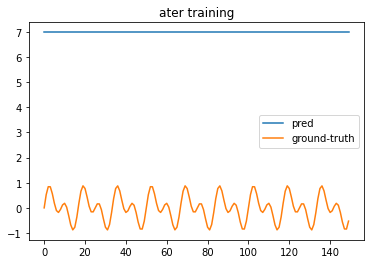

In [12]:
def predict(X):
    preds= []
    n_samples = Y.shape[0] # number of sample
    for i in range(n_samples):
        x,y = X[i],Y[i]
        _,y_hat = layers,y_hat = forward_pass(x)
        preds.append(y_hat)
    # convert to numpy array
    preds = np.array(preds)
    preds = np.squeeze(preds)
    return preds

preds = predict(X)
plt.plot(preds,label = 'pred')
plt.plot(Y,label = 'ground-truth')
plt.legend()
plt.title('ater training')
plt.show()

**backpropagation**

In [13]:
# backward though time
dU_u = np.zeros(U_u.shape)
dW_u = np.zeros(W_u.shape)
db_u = np.zeros(b_u.shape)
dU_r = np.zeros(U_r.shape)
dW_r = np.zeros(W_r.shape)
db_r = np.zeros(b_r.shape)
dU_h = np.zeros(U_h.shape)
dW_h = np.zeros(W_h.shape)
db_h = np.zeros(b_h.shape)
dV = np.zeros(V.shape)
db_y = np.zeros(b_y.shape)

print(f'dU_u = U_u shape: {dU_u.shape}')
print(f'dW_u = W_u shape: {dW_u.shape}')
print(f'db_u = b_u shape: {db_u.shape}')

print(f'dU_r = U_r shape: {dU_r.shape}')
print(f'dW_r = W_r shape: {dW_r.shape}')
print(f'db_r = b_r shape: {db_r.shape}')

print(f'dU_h = U_h shape: {dU_h.shape}')
print(f'dW_h = W_h shape: {dW_h.shape}')
print(f'db_h = b_h shape: {db_h.shape}')

print(f'dV = V shape: {dV.shape}')
print(f'db_y = b_y shape: {db_y.shape}')

dU_u = U_u shape: (100, 50)
dW_u = W_u shape: (100, 100)
db_u = b_u shape: (100, 1)
dU_r = U_r shape: (100, 50)
dW_r = W_r shape: (100, 100)
db_r = b_r shape: (100, 1)
dU_h = U_h shape: (100, 50)
dW_h = W_h shape: (100, 100)
db_h = b_h shape: (100, 1)
dV = V shape: (1, 100)
db_y = b_y shape: (1, 1)


In [46]:
class GRU():
    def __init__(self,hidden_dim=100,seq_len=50,input_dim = 1,output_dim = 1):
        self.hidden_dim = hidden_dim 
        self.seq_len = seq_len 
        self.input_dim = input_dim 
        self.output_dim = output_dim  
        # for update gates
        self.U_u = np.random.rand(hidden_dim,seq_len)
        self.W_u = np.random.rand(hidden_dim,hidden_dim)
        self.b_u = np.random.rand(hidden_dim,1)
        # for relevant gates
        self.U_r = np.random.rand(hidden_dim,seq_len)
        self.W_r = np.random.rand(hidden_dim,hidden_dim)
        self.b_r = np.random.rand(hidden_dim,1)
        # for current value
        self.U_h = np.random.rand(hidden_dim,seq_len)
        self.W_h = np.random.rand(hidden_dim,hidden_dim)
        self.b_h = np.random.rand(hidden_dim,1)
        # for output dim
        self.V = np.random.rand(output_dim,hidden_dim)
        self.b_y = np.random.rand(output_dim,1)
       
    def forward_pass(self,x):
        layers = [] 
        h_prev = np.zeros((self.hidden_dim,1))
        seq_len = x.shape[0]
        for t in range(seq_len):
            new_input = np.zeros((seq_len,self.input_dim))
            new_input[t] = x[t]
            # updated gate
            u_t = sigmoid(self.U_u @ new_input + self.W_u @ h_prev + self.b_u)
            # revelant gate
            r_t = sigmoid(self.U_r @ new_input + self.W_r @ h_prev + self.b_r)
            # tilde h
            h_til = tanh(self.U_h @ new_input + self.W_h @ (r_t * h_prev) + self.b_h)
            # h
            h = (1-u_t)* h_prev + u_t * h_til
            # output value
            y_hat = self.V@h + self.b_y
            # collect h_prev,h_til,h,u,r
            layers.append({'h_prev': h_prev,'h_til': h_til,'h':h,'u':u_t,'r':r_t})
            # update h
            prev_h = h
        return layers,y_hat
    
    def calc_loss(self,X,Y):
        loss = 0.0
        n_samples = Y.shape[0] # number of sample
        for i in range(n_samples):
        	y = Y[i]
        	_,y_hat = self.forward_pass(X[i])
        	loss += (y - y_hat)**2
        loss = 1/(2*n_samples)*np.float(loss)
        return loss
    
    def predict(self,X):
        preds= []
        n_samples = X.shape[0] # number of sample
        for i in range(n_samples):
            x = X[i]
            _,y_hat = layers,y_hat = self.forward_pass(x)
            preds.append(y_hat)
        # convert to numpy array
        preds = np.array(preds)
        preds = np.squeeze(preds)
        return preds
    
    def bptt(self,x,y,layers,y_hat,min_val = -10,max_val =10):
        # init matrices h_til = u_t = r_t = (100,1) = (hidden_dim,1)
        dU_u = np.zeros(self.U_u.shape) # (100,50) = (hidden_dim,seq_len)
        dW_u = np.zeros(self.W_u.shape) # (100,100) = (hidden_dim,hidden_dim)
        db_u = np.zeros(self.b_u.shape) # (100,1) = (hidden_dim,1)
        dU_r = np.zeros(self.U_r.shape) # (100,50) = (hidden_dim,seq_len)
        dW_r = np.zeros(self.W_r.shape) # (100,100) = (hidden_dim,hidden_dim)
        db_r = np.zeros(self.b_r.shape) # (100,1) = (hidden_dim,1)
        dU_h = np.zeros(self.U_h.shape) # (100,50) = (hidden_dim,seq_len)
        dW_h = np.zeros(self.W_h.shape) # (100,100) = (hidden_dim,hidden_dim)
        db_h = np.zeros(self.b_h.shape) # (100,1) = (hidden_dim,1)
        dV = np.zeros(self.V.shape)     # (1,100) = (output_dim,hidden_dim)
        db_y = np.zeros(self.b_y.shape) # (1,1) = (1,output_dim)
        
        # dLdy
        dLdy = y - y_hat # (1,1)
        # dLdh
        dLdh = self.V.T @ dLdy  # (100,1)x(1,1) = (100,1)
        # seq_lenght
        for t in range(x.shape[0]):
            # get current timestep input
            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            # dV
            dV += dLdy @ np.transpose(layers[t]['h']) # (1,1)x(1,100) = (1,100)
            # db_y
            db_y += dLdy # (1,1)
            # dLdh_til - content-state
            dLdh_til = dLdh*layers[t]['u'] # (100,1)*(100,1)
            # dLdr - reset gate
            dLdr = (1-layers[t]['h_til']**2)*(self.W_r@layers[t]['h_prev']) # (100,1)*[(100,100)x(100,1)]
            #print(f'dLdr {dLdr.shape}')
            # dLdu - update gate
            dLdu = dLdh*(-layers[t]['h_prev'] + layers[t]['h_til'])
            #print(f'dLdu {dLdu.shape}')
            # dldU_u
            dU_h += dLdh_til @ new_input.T # (100,1)x(1,50)
            # dLdW_u
            dW_h += dLdh_til @ layers[t]['h_prev'].T # (100,1)x(1,100)
            # dLdb_u
            db_h += dLdh_til
            # dldU_u
            dU_u += dLdu @ new_input.T # (100,1)x(1,50)
            # dLdW_u
            dW_u += dLdu @ layers[t]['h_prev'].T # (100,1)x(1,100)
            # dLdb_u
            db_u += dLdu
            # dldU_r
            dU_r += dLdr @ new_input.T # (100,1)x(1,50)
            # dLdW_r
            dW_r += dLdr @ layers[t]['h_prev'].T # (100,1)x(1,100)
            # dLdb_r
            db_r += dLdr
            
            #take care for exploding gradients
            if dV.max() > max_val:
                dV[dV > max_val] = max_val
            if dV.min() < min_val:
                dV[dV < min_val] = min_val

            if db_y.max() > max_val:
                db_y[db_y > max_val] = max_val
            if db_y.min() < min_val:
                db_y[db_y < min_val] = min_val

            if dU_h.max() > max_val:
                dU_h[dU_h > max_val] = max_val
            if dU_h.min() < min_val:
                dU_h[dU_h < min_val] = min_val

            if dW_h.max() > max_val:
                dW_h[dW_h > max_val] = max_val
            if dW_h.min() < min_val:
                dW_h[dW_h < min_val] = min_val

            if db_h.max() > max_val:
                db_h[db_h > max_val] = max_val
            if db_h.min() < min_val:
                db_h[db_h < min_val] = min_val

            if dU_u.max() > max_val:
                dU_u[dU_u > max_val] = max_val
            if dU_u.min() < min_val:
                dU_u[dU_u < min_val] = min_val

            if dW_u.max() > max_val:
                dW_u[dW_u > max_val] = max_val
            if dW_u.min() < min_val:
                dW_u[dW_u < min_val] = min_val

            if db_u.max() > max_val:
                db_u[db_u > max_val] = max_val
            if db_u.min() < min_val:
                db_u[db_u < min_val] = min_val

            if dU_r.max() > max_val:
                dU_r[dU_r > max_val] = max_val
            if dU_r.min() < min_val:
                dU_r[dU_r < min_val] = min_val

            if dW_r.max() > max_val:
                dW_r[dW_r > max_val] = max_val
            if dW_r.min() < min_val:
                dW_r[dW_r < min_val] = min_val

            if db_r.max() > max_val:
                db_r[db_r > max_val] = max_val
            if db_r.min() < min_val:
                db_r[db_r < min_val] = min_val
            
        db_y = db_y/t
        db_h = db_h/t
        db_u = db_u/t
        db_r = db_r/t
        
        return dU_u,dW_u,db_u,dU_r,dW_r,db_r,dU_h,dW_h,db_h,dV,db_y
    
    def train(self,X,Y,epochs,learning_rate,min_val,max_val,predict = True,verbose = True):
        # storge loss
        losses = []
        for epoch in range(epochs):
            
            loss = self.calc_loss(X,Y)
            losses.append(loss)
            title = f'epoch: {epoch} loss: {loss}' 
            if verbose: print(title)
            
            for i in tqdm.tqdm(range(X.shape[0])):
                x = X[i]
                y = Y[i]
                # forward pass
                layers,y_hat = self.forward_pass(x)
                # backward pass
                dU_u,dW_u,db_u,dU_r,dW_r,db_r,dU_h,dW_h,db_h,dV,db_y = self.bptt(x,y,layers,y_hat,min_val = min_val,max_val = max_val)
                # gradient descent
                self.U_u += dU_u*learning_rate
                self.W_u += dW_u*learning_rate
                self.b_u += db_u*learning_rate
                self.U_r += dU_r*learning_rate
                self.W_r += dW_r*learning_rate
                self.b_r += db_r*learning_rate
                self.U_h += dU_h*learning_rate
                self.W_h += dW_h*learning_rate
                self.b_h += db_h*learning_rate
                self.V += dV*learning_rate
                self.b_y += db_y*learning_rate
                
            if predict:
                preds = self.predict(X)
                plt.plot(preds,label = 'pred')
                plt.plot(Y,label = 'ground-truth')
                plt.title(title)
                plt.legend()
                plt.show()
                    
        return losses

layers len 50
y_hat [[5.18975991]]
loss 98.41620671113135


  2%|▏         | 3/150 [00:00<00:05, 25.64it/s]

epoch: 0 loss: 98.41620671113135


  2%|▏         | 3/150 [00:00<00:05, 24.79it/s]

epoch: 1 loss: 15.591321819493023


  2%|▏         | 3/150 [00:00<00:05, 26.78it/s]

epoch: 2 loss: 0.08393062667225654


  2%|▏         | 3/150 [00:00<00:05, 27.52it/s]

epoch: 3 loss: 0.06802203907438431


  2%|▏         | 3/150 [00:00<00:05, 26.78it/s]

epoch: 4 loss: 0.06778596359976329


  2%|▏         | 3/150 [00:00<00:05, 25.42it/s]

epoch: 5 loss: 0.06757575681178579


100%|██████████| 150/150 [00:05<00:00, 27.79it/s]


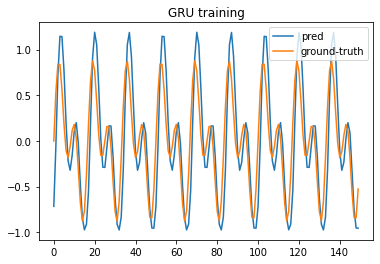

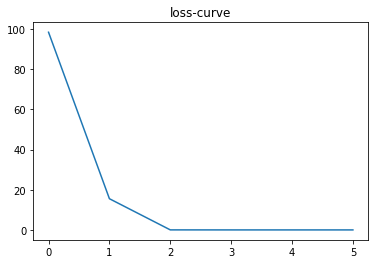

In [49]:
# hyperparameter
epochs = 6
learning_rate = 1e-4
min_val = -20
max_val = 20

node = GRU()

# forward pass
x = X[0]
y = Y[0]
layers,y_hat = node.forward_pass(x)
print(f'layers len {len(layers)}')
print(f'y_hat {y_hat}')

# calculate loss
loss = node.calc_loss(X,Y)
print(f'loss {loss}')

# train
losses = node.train(X,Y,epochs=epochs,learning_rate=1e-4,min_val = min_val,max_val = max_val,predict = False)

# predict
preds = node.predict(X)
plt.plot(preds,label = 'pred')
plt.plot(Y,label = 'ground-truth')
plt.title('GRU training')
plt.legend()

#plt.savefig('predict.png')
plt.figure()
plt.plot(losses,label = 'losses')
plt.title('loss-curve')

plt.show()

Let compare this with the RNN basic model

In [52]:
class RNN():
    def __init__(self,hidden_dim=100,seq_len=50,input_dim = 1,output_dim = 1,seed = 3454):
        self.hidden_dim = hidden_dim
        self.seq_len = seq_len
        self.input_dim = input_dim
        self.output_dim  = output_dim
        self.U = np.random.uniform(0,1,(hidden_dim,seq_len)) # (100,50)
        self.W = np.random.uniform(0,1,(hidden_dim,hidden_dim)) # (100,100)
        self.V = np.random.uniform(0,1,(output_dim,hidden_dim)) # (1,100)
        self.bh = np.random.uniform(0,1,(hidden_dim,1))
        self.by = np.random.uniform(0,1,(output_dim,1))
        
    def forward_pass(self,x):
        # init a list of dict to storage
        layers = []
        h_prev = np.zeros((hidden_dim,1))
        for t in range(x.shape[0]):
            new_input = np.zeros(x.shape)
            new_input[t] = x[t]
            z = self.U @ new_input + self.W @ h_prev + self.bh
            h = tanh(z)
            y_hat = V @ h + self.by
            layers.append({'h':h,'h_prev':h_prev})
            h_prev = h
        return layers,y_hat
        
    def calc_loss(self,X,Y):
        loss = 0.0
        m = Y.shape[0]
        for i in range(m):
            x,y = X[i],Y[i]
            _,y_hat = self.forward_pass(x)
            loss += (y-y_hat)**2
        loss = 1/(2*m) * np.float(loss)
        return loss

    def predict(self,X):
        preds = []
        m = X.shape[0] # number of samples
        for i in range(m):
            x = X[i]
            _,y_hat = self.forward_pass(x)
            preds.append(y_hat)
        # convert to numpy array
        preds = np.array(preds)
        preds = np.squeeze(preds)
        return preds
    
    def calc_prev_d(self,h,d,W):
        '''
        Calculate the next previous term d after the first term, this function support for bptt function
        Ex: d2 = d3*W*(1-h**2)
        '''
        d_sum = (1-h**2)*d
        return W.T @ d_sum
    
    def bptt(self,x,y,layers,y_hat,bptt_truncate,min_val=-10,max_val=10):
        # differentials at current prediction
        dW = np.zeros(self.W.shape)
        dU = np.zeros(self.U.shape)
        dV = np.zeros(self.V.shape)
        db_h = np.zeros(self.bh.shape)
        db_y = np.zeros(self.by.shape)
        # differentials each timestep
        dW_t = np.zeros(self.W.shape)
        dU_t = np.zeros(self.U.shape)
        dV_t = np.zeros(self.V.shape)
        # diffeentials each backpropagation truncate
        dW_i = np.zeros(self.W.shape)
        dU_i = np.zeros(self.U.shape)
        dV_i = np.zeros(self.V.shape)
        # dLdy
        dLdy = y - y_hat
        # dLdh
        dLdh = self.V.T @ dLdy
        # dLdby
        db_y = dLdy
        for t in range(x.shape[0]):
            # dLdV
            dV_t = dLdy @ np.transpose(layers[t]['h'])
            # first term d = (y-y_hat)V
            d_t = dLdh * (1 - layers[t]['h']**2)
            # dLdbh
            db_h += d_t
            for _ in range(t,max(-1,bptt_truncate-1),-1):
                new_input = np.zeros(x.shape)
                new_input[_] = x[_]
                dU_i = d_t @ new_input.T
                dW_i = d_t @ layers[_]['h_prev'].T
                dU_t += dU_i
                dW_t += dW_i
                # update term d
                d_t = self.calc_prev_d(layers[_]['h_prev'],d_t,self.W)
            dV += dV_t
            dU += dU_t
            dW += dW_t
            # take care of possible exploding gradients
            if dU.max() > max_val:
                dU[dU > max_val] = max_val
            if dV.max() > max_val:
                dV[dV > max_val] = max_val
            if dW.max() > max_val:
                dW[dW > max_val] = max_val

            if dU.min() < min_val:
                dU[dU < min_val] = min_val
            if dV.min() < min_val:
                dV[dV < min_val] = min_val
            if dW.min() < min_val:
                dW[dW < min_val] = min_val
        return dU,dV,dW,db_h,db_y
            
    def train(self,X,Y,epochs,learning_rate,bptt_truncate,min_val,max_val,predict = True,verbose = True):
        # storage lost
        losses = []
        for epoch in range(epochs):
            loss = self.calc_loss(X,Y)
            losses.append(loss)
            title = f'epoch: {epoch} loss: {loss}'
            if verbose: print(title)
            
            for i in tqdm.tqdm(range(X.shape[0])):
                x,y = X[i],Y[i]
                # forward pass
                layers,y_hat = self.forward_pass(x)
                dU,dV,dW,db_h,db_y = self.bptt(x,y,layers,y_hat,bptt_truncate,min_val,max_val)
                # SGD
                self.U += learning_rate * dU
                self.W += learning_rate * dW
                self.V += learning_rate * dV
                self.bh += learning_rate * db_h
                self.by += learning_rate * db_y
                
            if predict:
                preds = self.predict(X)
                plt.plot(preds,label = 'pred')
                plt.plot(Y,label = 'ground-truth')
                plt.title(title)
                plt.legend()
                plt.show()
                    
        return losses

layers len 50
y_hat [[47.08476333]]
loss 1108.6124690126364


  1%|          | 1/150 [00:00<00:15,  9.61it/s]

epoch: 0 loss: 1108.6124690126364


  0%|          | 0/150 [00:00<?, ?it/s]

epoch: 1 loss: 1075.8499654756356


  1%|          | 1/150 [00:00<00:23,  6.45it/s]

epoch: 2 loss: 1044.0557899417483


  1%|          | 1/150 [00:00<00:15,  9.35it/s]

epoch: 3 loss: 1013.2013225541007


  1%|          | 1/150 [00:00<00:18,  8.20it/s]

epoch: 4 loss: 983.2587893425273


  1%|▏         | 2/150 [00:00<00:13, 11.24it/s]

epoch: 5 loss: 954.2012372226011


  0%|          | 0/150 [00:00<?, ?it/s]

epoch: 6 loss: 926.0025097335895


  1%|          | 1/150 [00:00<00:15,  9.43it/s]

epoch: 7 loss: 898.6372234935043


  1%|          | 1/150 [00:00<00:15,  9.61it/s]

epoch: 8 loss: 872.0807453500358


  1%|          | 1/150 [00:00<00:16,  9.09it/s]

epoch: 9 loss: 846.3091702068205


  1%|          | 1/150 [00:00<00:22,  6.62it/s]

epoch: 10 loss: 821.299299505067


  1%|          | 1/150 [00:00<00:16,  8.93it/s]

epoch: 11 loss: 797.028620341181


  0%|          | 0/150 [00:00<?, ?it/s]

epoch: 12 loss: 773.4752852015887


  0%|          | 0/150 [00:00<?, ?it/s]

epoch: 13 loss: 750.6180922965168


  0%|          | 0/150 [00:00<?, ?it/s]

epoch: 14 loss: 728.4364664750203


100%|██████████| 150/150 [00:25<00:00,  5.95it/s]


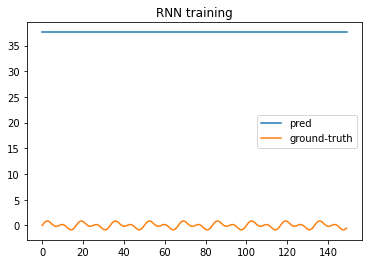

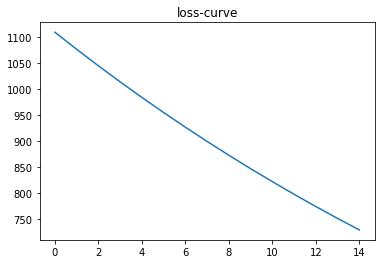

In [53]:
# hyperparameter
epochs = 15
learning_rate = 1e-4
min_val = -200
max_val = 200

node = RNN()

# forward pass
x = X[0]
y = Y[0]
layers,y_hat = node.forward_pass(x)
print(f'layers len {len(layers)}')
print(f'y_hat {y_hat}')

# calculate loss
loss = node.calc_loss(X,Y)
print(f'loss {loss}')

# train
losses = node.train(X,Y,epochs=epochs,learning_rate=1e-4,bptt_truncate = 10,min_val = min_val,max_val = max_val,predict = False)

# predict
preds = node.predict(X)
plt.plot(preds,label = 'pred')
plt.plot(Y,label = 'ground-truth')
plt.title('RNN training')
plt.legend()

#plt.savefig('predict.png')
plt.figure()
plt.plot(losses,label = 'losses')
plt.title('loss-curve')

plt.show()

### comment

Even you don't update for `W_u,U_u,b_u`, `W_r,U_r,b_r`, `W_r,U_r,b_r`, It seem like your model stil work fine sometime

![predicts](predict.png)

In [ ]:
layers[0]['u'].shape

### GRU Keras

### build LSTM form scratch

![LSTM](LSTM_1.png)

**Forget State** decide how many we need to take from previous `cell_state`

**Input State** decide how many `input` of the `state` and `hidden layer` of `layer` we need to take from previous

**Output State** decide how many we need to take from previous `cell state` to become `output` of the `hidden state` and for calculating `output` $y_{t}$ for `state` t

**Forward pass**

![LSTM2](LSTM2.png)

**Backward propagation though time**

![LSTM6](LSTM6.png)

In `LSTM` we do care about $\frac{\partial{c_{t}}}{\partial{c_{t-1}}} = f_{t}$ because $ 0 < f_{t} < 1$ so basiclly `LSTM` still have vanishing gradient but it does not effect more as RNN because when we carry information on `cell_state` we don't have to forget the information value in previous cell state so $f_{t} \simeq 1$ so we can avoid vanishing gradient

### LSTM Keras

### References

[coursera](https://www.coursera.org/lecture/nlp-sequence-models/longshort-term-memory-lstm-KXoay)

[Deep Learning 71: Back-propagation in Gated Recurrent Unit (GRU) Architecture](https://www.youtube.com/watch?v=P0W3iHKYOHc)

[GRU and LSTM](http://dprogrammer.org/rnn-lstm-gru)

[GRU keras](https://pythonalgos.com/build-a-gru-rnn-in-keras/)

[LateX math sympol](https://oeis.org/wiki/List_of_LaTeX_mathematical_symbols)

[RNN-LSTM-in-numpy](https://github.com/CaptainE/RNN-LSTM-in-numpy)

[lstm-gru-scartch](https://github.com/gstechgeek/LSTM_from_scratch)

[lstm-scratch](https://github.com/nicodjimenez/lstm)

[RecurrentNeuralNet](https://github.com/mukul-rathi/deep-learning-tutorials/tree/master/RecurrentNeuralNet)

[lstm_from_scratch](https://github.com/Aidandos/lstm_from_scratch)

[lstm-scratch2](https://github.com/PNilay/LSTM-Network-from-Scratch)

[LSTM tensorflow](https://github.com/mayuri0192/LSTM-Implementation-from-Scratch)

[LSTM Image-Captioning](https://github.com/divyanshj16/Image-Captioning)

[LSTM-Human-Activity-Recognition](https://github.com/guillaume-chevalier/LSTM-Human-Activity-Recognition)

[LSTM-C++](https://github.com/abstractguy/LSTM)

[lstm-models-for-time-series-forecasting](https://machinelearningmastery.com/how-to-develop-lstm-models-for-time-series-forecasting/)

[MIT 6.S191 (2021): Recurrent Neural Networks](https://www.youtube.com/watch?v=qjrad0V0uJE&t=3061s)

[Stock Price Prediction Using Python & Machine Learning](https://www.youtube.com/watch?v=QIUxPv5PJOY)

[Python: Real-time Automated Long Short Term Memory (LSTM) Short-term Load Forecasting & Plotting](https://www.youtube.com/watch?v=aQxPRsba23Y)
